参考：
1. [pluskid 支持向量机系列](http://blog.pluskid.org/?page_id=683)
2. [支持向量机通俗导论（理解SVM的三层境界）](https://blog.csdn.net/v_JULY_v/article/details/7624837#commentBox)
3. [解密SVM系列 on2way](https://so.csdn.net/so/search/s.do?q=svm&t=blog&u=on2way)

# SVM


> **回头学习的时候，把分类函数、代价函数等所有公式列出来，别问推导过程。然后实现+学习调包使用。之后，再学习推导**

## 在线性可分下的一些定义与公式


**超平面**：$$w^Tx+b=0$$

**标签**：-1 或者 +1

**分类函数**：$$f(x)=\left\{\begin{matrix}
w^Tx_i+b > 0, \hat{y_i} = +1\\ 
w^Tx_i+b = 0, x_i 在超平面上\\
w^Tx_i+b < 0, \hat{y_i} = -1\end{matrix}\right.$$

**函数间隔(functional margin)** ：通过观察 $w^Tx+b$ 结果的符号与标签 $y$ 符号是否一致可判断分类是否正确，即 $y*(w^Tx+b)$ 的符号来判定分类的正确性。那么，就把这个公式作为函数间隔的定义$$\hat{\gamma_i} = y_i*(w^Tx_i+b)$$ 而超平面关于训练数据集的函数间隔为：$$\hat{\gamma} = min~\hat{\gamma},i=1,..,m$$ 函数间隔存在这么一个问题：如果等比例的改变 w 和 b （如改为 2w 和 2b ），此时超平面没有改变，但函数间隔值却变成原来的 2 倍。

**几何间隔(geometrical margin)**: 指点 $x$ 到超平面的距离 $$\gamma = \frac{w^Tx+b}{||w||} = \frac{f(x)}{||w||}$$ 不过，这里的 $\gamma$ 是带符号的，我们需要的只是它的绝对值，因此类似地，也乘上对应的类别 y 即可，因此实际上我们定义 geometrical margin 为：$$\widetilde{\gamma } = y\frac{w^Tx+b}{||w||} = y\frac{f(x)}{||w||}$$

**函数间隔和集合间隔的关系**：$$\widetilde{\gamma} = y\hat{\gamma} = \frac{\hat{\gamma}}{||w||}$$

## 最大间隔分类器

**最大间隔分类器的由来**：从几何直观上来说，由于超平面是用于分隔两类数据的，越接近超平面的点越“难”分隔，因为如果超平面稍微转动一下，它们就有可能跑到另一边去。反之，如果是距离超平面很远的点则很容易分辩出其类别。所以，对一个数据点进行分类，当超平面离数据点的“间隔”越大，分类的确信度（confidence）也越大。所以，为了使得分类的确信度尽量高，需要让所选择的超平面能够最大化这个“间隔”值。

**目标优化函数**：最大化几何间隔，$$\left\{\begin{matrix}
max~\widetilde{\gamma}\\ 
s.t.  y_i(w^Tx_i+b)=\hat{\gamma_i} \geq \hat{\gamma}, i=1,..,m\end{matrix}\right.$$ 其中，约束条件是由超平面关于训练数据集的函数间隔得来的。我们可以令函数间隔 $\hat{\gamma}=1$，使目标函数便于推导和优化，同时又不影响目标函数的优化（**TODO：原理我也没懂**），则目标函数化为：$$\left\{\begin{matrix}
max~\widetilde{\gamma}= max~\frac{1}{||w||}\\ 
s.t.  y_i(w^Tx_i+b)=\hat{\gamma_i} \geq 1, i=1,..,m\end{matrix}\right.$$

**为何不是最大化函数间隔**：因为在超平面固定以后，可以等比例地缩放 $w$ 和 $b$ 的值，这样可以使得的值任意大，亦即函数间隔可以在超平面保持不变的情况下被取得任意大。但几何间隔因为除上了 $||w||$，使得在缩放 $w$ 和 $b$ 的时候几何间隔的值是不会改变的，它只随着超平面的变动而变动，因此，这是更加合适的一个间隔。

**支持向量(supporting vector)** : 位于 $w^Tx+b=\pm1$ 的所有点的集合。根据定义，支持向量上的点还满足 $y(w^T+b)=\hat{y}=1$ 。而对于所有不是支持向量上的点，则满足 $y(w^Tx+b)>1$ ,这是根据目标优化函数中的约束条件得到的。


## 在线性不可分下

**引入核函数目的**：在线性不可分的情况下，支持向量机首先在低维空间中完成计算，然后通过核函数将输入空间映射到高维特征空间，最终在高维特征空间中构造出最优分离超平面，从而把平面上本身不好分的非线性数据分开。

**核函数处理非线性问题的基本思想**：将输入空间映射到高维特征空间，最终在高维特征空间中就会变成线性可分，然后构造出最优分离超平面。举个例子，假设在样本由 2 个特征 $(x_1,x_2)$ 表示，一个数据集中理想的分界线是一个 "圆形"，即超平面为 $$a_1x_1 + a_2x_1^2 + a_3x_2 + a_4x_2^2 + a_5x_1x_2 + a_6 = 0$$。如果我们构造另外一个五维空间，其中五个坐标值分别为$z_1=x_1,z_2=x_1^2,z_3=x_2,z_4=x_2^2,z_5=x_1x_2$。那么显然，超平面为$$\sum_{i=1}^{5}a_iz_i+a_6=a^Tz+a_6=0$$ 通过二维映射到更高维度（例子中五维），实现在新的空间中原来的数据编程线性可分，从而使用之前推到的线性分类算法就可以进行处理了。

当然上面举的例子只是用于理解核函数的基本思想，实际上不能直接这样映射。如果采用上例的映射规则：二维需要映射到五维，三维则需要映射到十九维$(z_1=x_1,z_2=x_2,z_3=x_3,z_4=x_1x_2,z_5=x_2x_3....z_{19}=x_3^3)$ ，这个维度是呈指数级增长。所以肯定不是采用上例的映射规则。

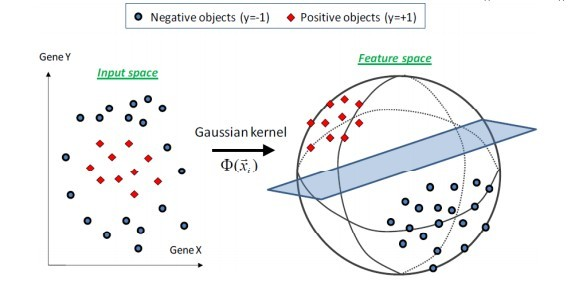

**核函数的本质**：当在低维度线性不可分时，**核函数在低维度上进行计算之后**，再映射到高维度中。这就避免上面所说维度爆炸增长问题。